In [3]:
import sys
sys.path.insert(0, '../Data')

from fmp_module import *
%matplotlib inline


In [6]:
# Configurações globais para o tamanho da fonte
plt.rcParams.update({'font.size': 14})  # Altere 12 para o tamanho desejado
def plot_transition_matrix(A, log=True, ax=None, figsize=(6, 5), title='',
                           xlabel='Estado', ylabel='Estado',
                           cmap='gray_r', quadrant=False):
    """Plot a transition matrix for 24 chord models (12 major and 12 minor triads)

    Notebook: C5/C5S3_ChordRec_HMM.ipynb

    Args:
        A: Transition matrix
        log: Show log probabilities (Default value = True)
        ax: Axis (Default value = None)
        figsize: Width, height in inches (only used when ax=None) (Default value = (6, 5))
        title: Title for plot (Default value = '')
        xlabel: Label for x-axis (Default value = 'State (chord label)')
        ylabel: Label for y-axis (Default value = 'State (chord label)')
        cmap: Color map (Default value = 'gray_r')
        quadrant: Plots additional lines for C-major and C-minor quadrants (Default value = False)

    Returns:
        fig: The created matplotlib figure or None if ax was given.
        ax: The used axes.
        im: The image plot
    """
    fig = None
    if ax is None:
        fig, ax = plt.subplots(1, 1, figsize=figsize)
        ax = [ax]

    if log is True:
        A_plot = np.log(A)
        cbar_label = 'Log probabilidade'
        clim = [-6, 0]
    else:
        A_plot = A
        cbar_label = 'Probabilidade'
        clim = [0, 1]
    im = ax[0].imshow(A_plot, origin='lower', aspect='equal', cmap=cmap, interpolation='nearest')
    im.set_clim(clim)
    plt.sca(ax[0])
    cbar = plt.colorbar(im)
    ax[0].set_xlabel(xlabel)
    ax[0].set_ylabel(ylabel)
    ax[0].set_title(title)
    cbar.ax.set_ylabel(cbar_label)

    chord_labels = get_chord_labels()
    chord_labels_squeezed_1 = chord_labels.copy()
    chord_labels_squeezed_2 = chord_labels.copy()
    for k in [1, 3, 5, 6, 8, 10, 11, 13, 14, 15, 17, 18, 20, 21, 22]:
        chord_labels_squeezed_1[k] = ''
    for k in [1, 3, 5, 6, 8, 10, 11, 13, 15, 17, 18, 20, 22]:
        chord_labels_squeezed_2[k] = ''

    ax[0].set_xticks(np.arange(24))
    ax[0].set_yticks(np.arange(24))
    ax[0].set_xticklabels(chord_labels_squeezed_1)
    ax[0].set_yticklabels(chord_labels_squeezed_2)

    if quadrant is True:
        ax[0].axvline(x=11.5, ymin=0, ymax=24, linewidth=2, color='r')
        ax[0].axhline(y=11.5, xmin=0, xmax=24, linewidth=2, color='r')

    return fig, ax, im

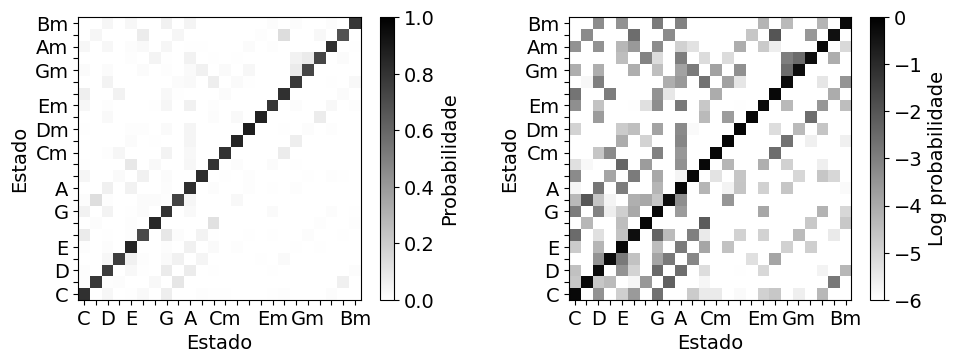

In [7]:
fn_csv = '../Data/Matrices/FMP_C5_transitionMatrix_Beatles.csv'
A_est_df = pd.read_csv(fn_csv, delimiter=';')
A_est = A_est_df.to_numpy('float64')
fig, ax = plt.subplots(1, 2, gridspec_kw={'width_ratios': [1, 1], 
                                          'height_ratios': [1]}, 
                       figsize=(10, 3.8))
plt.rcParams.update({'font.size': 14})
plot_transition_matrix(A_est, log=False, ax=[ax[0]])
plot_transition_matrix(A_est, ax=[ax[1]])
plt.tight_layout()

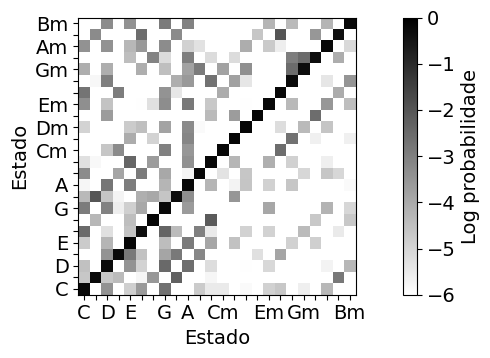

In [8]:
A_ti = matrix_chord24_trans_inv(A_est)

fig, ax = plt.subplots(1, 1, gridspec_kw={'width_ratios': [1], 
                                          'height_ratios': [1]}, 
                       figsize=(10, 3.8))

plot_transition_matrix(A_est, ax=[ax])
plt.tight_layout()

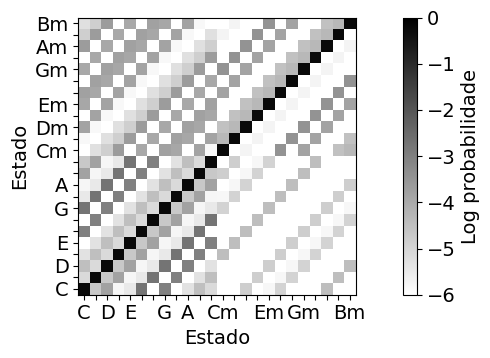

In [9]:
fig, ax = plt.subplots(1, 1, gridspec_kw={'width_ratios': [1], 
                                          'height_ratios': [1]}, 
                       figsize=(10, 3.8))
plot_transition_matrix(A_ti, ax=[ax])
plt.tight_layout()

In [14]:
audio_path = '../Data/Audios/'
label_path = '../Data/Labels/'
var_path = '../Data/Variables/'

audios = var_path + 'violin_audio.txt'
labels = var_path + 'violin_label.txt'

color_ann = {'N': 'white', 
             'C': 'peru', 'C#': 'springgreen', 'D': 'coral', 
             'D#': 'olive', 'Dm': 'teal', 'Em': 'pink',
             'F': 'greenyellow', 'F#': 'purple','G': 'steelblue', 'G#':'indigo', 
             'Am':'orange', 'A#':'saddlwbrown', 'A#m':'lightcoral'}

song_selected = [0]

In [21]:
audio_list = get_files(audios, audio_path)
label_list = get_files(labels, label_path)

print(audio_list, label_list)

name_list = get_name_list(audio_list)
song_dict = get_song_dict(name_list, audio_list, label_list)
song_dict

['../Data/Audios/scale - Escala Maior no Violino.wav'] ['../Data/Labels/violin_vibrato.csv']


{0: ['Escala Maior no Violino',
  'r',
  '../Data/Audios/scale - Escala Maior no Violino.wav',
  '../Data/Labels/violin_vibrato.csv']}

In [22]:
print('===== Computation of STFT-based chromagrams =====')
X_dict_STFT, Fs_X_dict_STFT, ann_dict_STFT, x_dur_dict, chord_labels = compute_X_dict(song_dict, song_selected, version='STFT')
print('===== Computation of CQT-based chromagrams =====')
X_dict_CQT, Fs_X_dict_CQT, ann_dict_CQT, x_dur_dict, chord_labels = compute_X_dict(song_dict, song_selected, version='CQT')
print('===== Computation of IIR-based chromagrams =====')
X_dict_IIR, Fs_X_dict_IIR, ann_dict_IIR, x_dur_dict, chord_labels = compute_X_dict(song_dict, song_selected, version='IIR')

===== Computation of STFT-based chromagrams =====
Processing:  Escala Maior no Violino
===== Computation of CQT-based chromagrams =====
Processing:  Escala Maior no Violino
===== Computation of IIR-based chromagrams =====
Processing:  Escala Maior no Violino


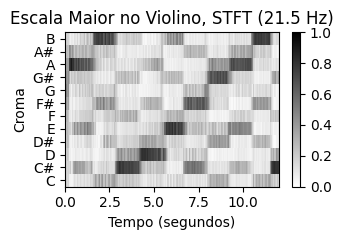

In [23]:
# STFT
get_chromagram(song_selected, song_dict, Fs_X_dict_STFT, X_dict_STFT)

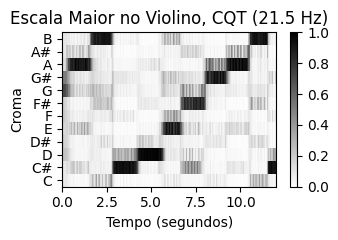

In [24]:
# CQT
chroma_type = 1
get_chromagram(song_selected, song_dict, Fs_X_dict_CQT, X_dict_CQT, chroma_type=chroma_type)

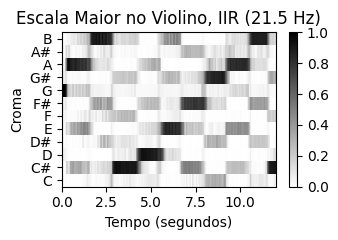

In [25]:
# IIR
chroma_type = 2
get_chromagram(song_selected, song_dict, Fs_X_dict_IIR, X_dict_IIR, chroma_type=chroma_type)